<a href="https://colab.research.google.com/github/brnn1/CSST_102/blob/main/3A_DELFIN_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/datasets_house_prices.csv')
print(df.head())

print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)


def compute_weights(X, y):
    X = add_intercept(X)
    try:
        weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    except np.linalg.LinAlgError:
        print("Matrix is not invertible. Try adding regularization or removing redundant features.")
        weights = np.zeros(X.shape[1])
    return weights

def predict(X, weights):
    X = add_intercept(X)
    return np.dot(X, weights)


   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [ ]:
weights = compute_weights(X_train, y_train)


In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


y_pred = predict(X_test, weights)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18376262.889574707


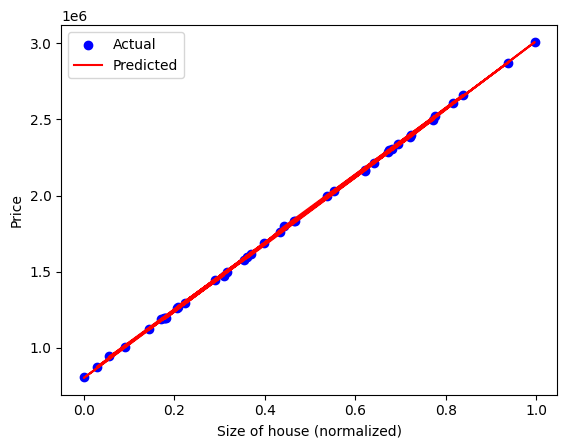

In [ ]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Size of house (normalized)')
plt.ylabel('Price')
plt.legend()
plt.show()


Step 5
 Here we represent the performance of linear regression model graphically where maintain some feature like 'Size' and plot a line here which describe that fit the best boundary against data points. The Scatter plot, original house prices (blue dots) and normalized size of the houses The regression line (in red) is the model's predictions, and it a series of points: each point predict something through that dataset. We can use this visualization to do a sanity check on the extent of which our model fits the data and if you are capturing accurately what is happening with house prices. Even though it is just for one feature i.e Size, this gives an idea about how well the model does.